<a href="https://colab.research.google.com/github/priyanka-sidhuraj/67/blob/master/126_PRIYANKA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_test.shape

(10000, 1)

In [ ]:
y_train = y_train.reshape(-1,)

y_test = y_test.reshape(-1,)

In [ ]:
y_test.shape #converted to 1d

(10000,)

In [ ]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

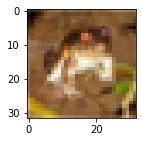

In [22]:
plt.figure(figsize = (10,2))
plt.imshow(X_train[0])

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (10,2))
    plt.imshow(X[index]) #the image
    plt.xlabel(classes[y[index]])

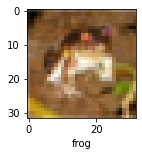

In [ ]:
plot_sample(X_train, y_train, 0)

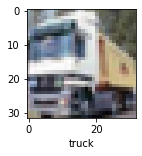

In [ ]:
plot_sample(X_train, y_train, 1)

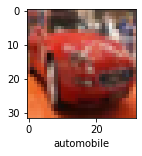

In [ ]:
plot_sample(X_train, y_train, 5)

1st normalize the data and 
create ANN and
create CNN

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    #softmax normalizez your probabilty
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 125s 80ms/step - loss: 1.8138 - accuracy: 0.3538
Epoch 2/5
1563/1563 [==============================] - 126s 81ms/step - loss: 1.6232 - accuracy: 0.4277
Epoch 3/5
1563/1563 [==============================] - 122s 78ms/step - loss: 1.5395 - accuracy: 0.4592
Epoch 4/5
1563/1563 [==============================] - 125s 80ms/step - loss: 1.4800 - accuracy: 0.4774
Epoch 5/5
1563/1563 [==============================] - 124s 80ms/step - loss: 1.4293 - accuracy: 0.4977


Now let us build a convolutional neural network to train our images!!


In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),# filters 32 deducts 32 diff features (edges)
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 68s 43ms/step - loss: 1.4775 - accuracy: 0.4658
Epoch 2/10
1563/1563 [==============================] - 68s 44ms/step - loss: 1.1228 - accuracy: 0.6059
Epoch 3/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.9892 - accuracy: 0.6544
Epoch 4/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.9117 - accuracy: 0.6826
Epoch 5/10
1563/1563 [==============================] - 68s 44ms/step - loss: 0.8444 - accuracy: 0.7018
Epoch 6/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.7868 - accuracy: 0.7276
Epoch 7/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.7445 - accuracy: 0.7403
Epoch 8/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.6932 - accuracy: 0.7591
Epoch 9/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.6540 - accuracy: 0.7728
Epoch 10/10
1563/1563 [==============================] - 69s 44m